## Homework 1
### I. Problem 1.2 on page 63 of the book by Carmona.
1. In R, generate a sample of size N = 1,024 from the exponential distribution
with rate parameter r = 0.2. Call X the vector containing the sample values.
2. Plot on the same graph, the exact (theoretical) density of the distribution of X, and a
histogram of X. It is recommended to try several values for the numbers of bins, and to
report only the result found most satisfactory.
3. Plot on the same graph, the same theoretical density as before, together with a kernel
density estimate of the distribution of X. Again, it is recommended to try several values of
the bandwidth, and to report only the result found most satisfactory.
4. Compare the two plots and explain the reasons for the differences. Say which estimate of
the density you prefer, and explain why.

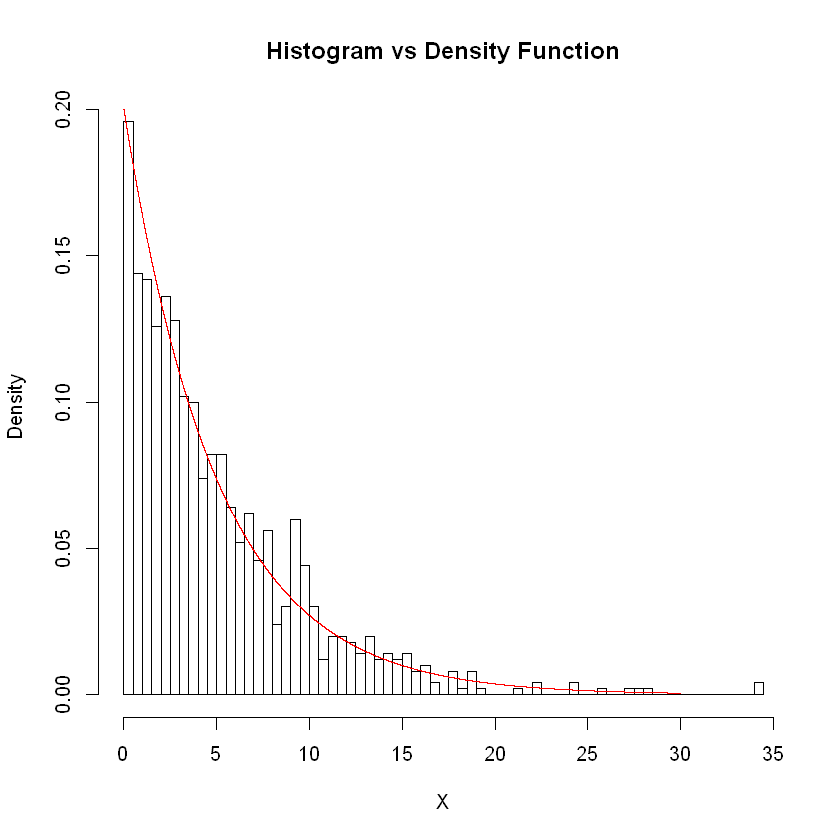

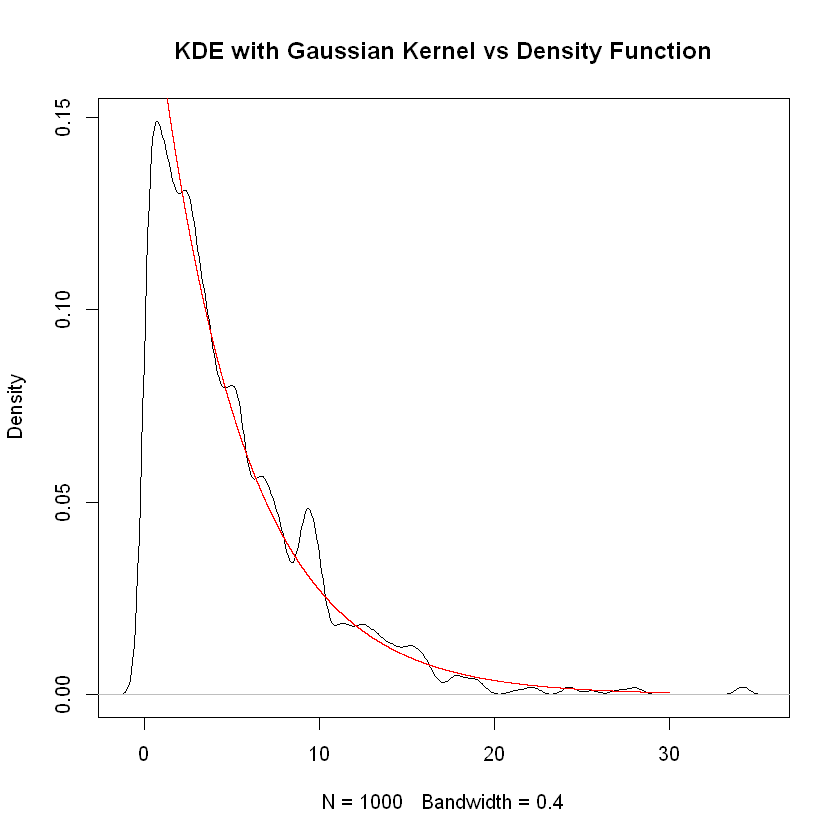

In [91]:
# 1.
rate = 0.2
num_sample = 1000
X <- rexp(num_sample, rate)
# 2.
par(mfrow=c(1,1)) 
hist(X, breaks=50, freq = F,main="Histogram vs Density Function") 
x<-seq(0,30,by=0.001)
y<-dexp(x,rate)
points(x, y, type="l", col="red")

# 3.
bw <- 0.4
KD5 <- density(X, kernel = "gaussian", bw = bw) 
plot(KD5 ,main="KDE with Gaussian Kernel vs Density Function")


x<-seq(0,30,by=0.001)
y<-dexp(x,rate)
points(x, y, type="l", col="red")

# 4.
# Comparing these two methods.We can see the distogram use rectangles to approximate the probability density 
# function, and the KDE use a curve to do it. The are different because the histogram counts the total number
# in the intervals but the KDE method average different kernels centered at each data point. 
# For me, I prefer the KDE method, because it seems that it gives better approximation around 0


### III. Problem 1.9, part 1 on page 66 of the book by Carmona.
1. 
Recall the formulas derived in the text for the cdf $F_{λ}(x) = P\{X ≤ x\}$ of a random
variable X with an exponential distribution with scale parameter λ > 0. and its inverse
 $ F_{λ}^{ −1} $
 and write an R function myrexp which takes the parameters N, and LAMBDA, and
which returns a numeric vector of length N containing N samples of random variates from
the exponential distribution with scale parameter LAMBDA.

2. Use your function myrexp to generate a sample of size N = 1024 from the exponential distribution
with mean 1.5, and use the function rexp in R to generate a sample of the same size from the same
distribution. Draw a Q-Q plot of the two samples. Are you satisfied with the performance of your
simulation function myrexp? Explain why.



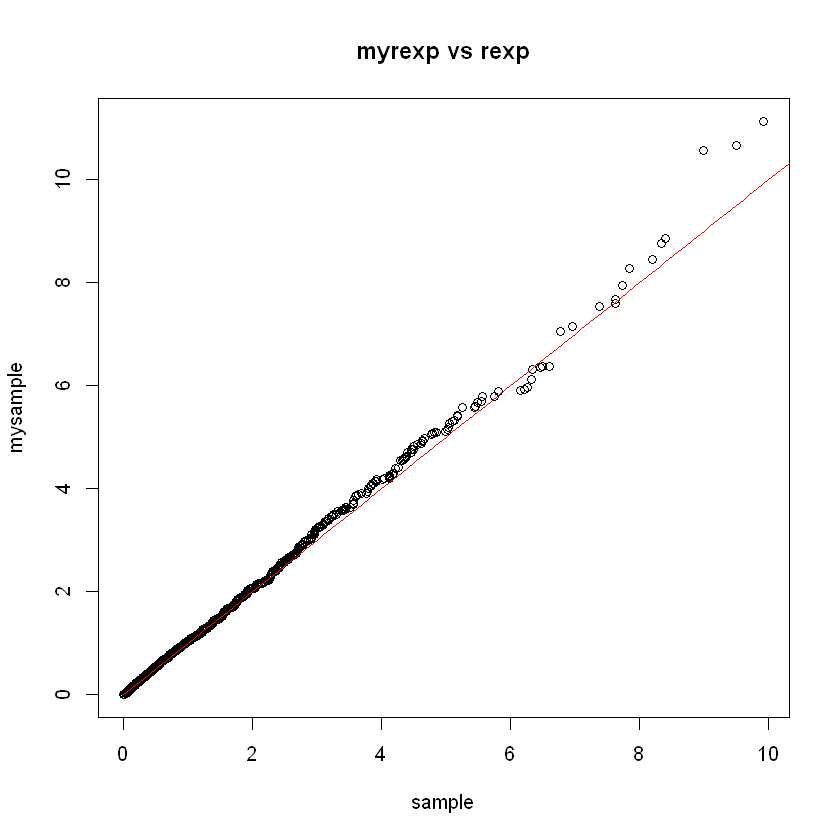

In [69]:
# 1.
myrexp <- function(n, lambda) {
    p = runif(n, 0, 1)
    return(qexp(p, rate=lambda))
}
# 2.
# the mean is 1/rate, while mean = 1.5, so the rate would be 1/1.5
r <- 1/1.5
N = 1024
sample <- rexp(N, rate = r)
mysample <- myrexp(N, r)

qqplot(sample, mysample, main="myrexp vs rexp")
x = seq(0, 12, 0.1)
points(x, x, type="l", col="red")
# I am satisfied with the plot, because the qqplot is almost linear. The line is shown in red


### IV. 
Download the dataset“DHSI” from the course website, which is daily data of Hang Seng Index
from 1986-12-31 to 2018-07-31. Conduct the following analysis parallel to what we did in class for S&P500
index.
1. Extract the daily close price of DHSI and name the series as “HSI”. Compute log returns of “HSI”
and name the series as “DHSILR”. Draw time series plots of the index “HSI” and the log returns
“DHSILR” (cf. Lect 2 p.4).
2. Draw histograms of DHSILR with bin sizes = 20, 50, 500 and 5000 (cf. Lect 2 p.23).
3. Draw histogram of DHSILR with bin size = 50, and superimpose the fitted normal density curve (cf.
Lect 2 p.25 ).
4. Conduct kernel density estimation of DHSILR with different kernels (Gaussian, rectangular, triangular,
and cosine) and plot the results (cf. Lect 2 p.29).
5. Try different choices of bandwidths (0.01, 0.001) for kernel density estimation, and compare the results
with histogram with bin size of 100 (cf. Lect 2 p.30).
6. Compute the empirical VaR and the VaR under normal assumption for DHSILR for q=0.01 and 0.001
(cf. Lect 3 p.20).
7. Compute the empirical expected shortfall and the expected shortfall under normal assumption for
DHSILR for q=0.01 and 0.001 (cf. Lect 3 p.23).

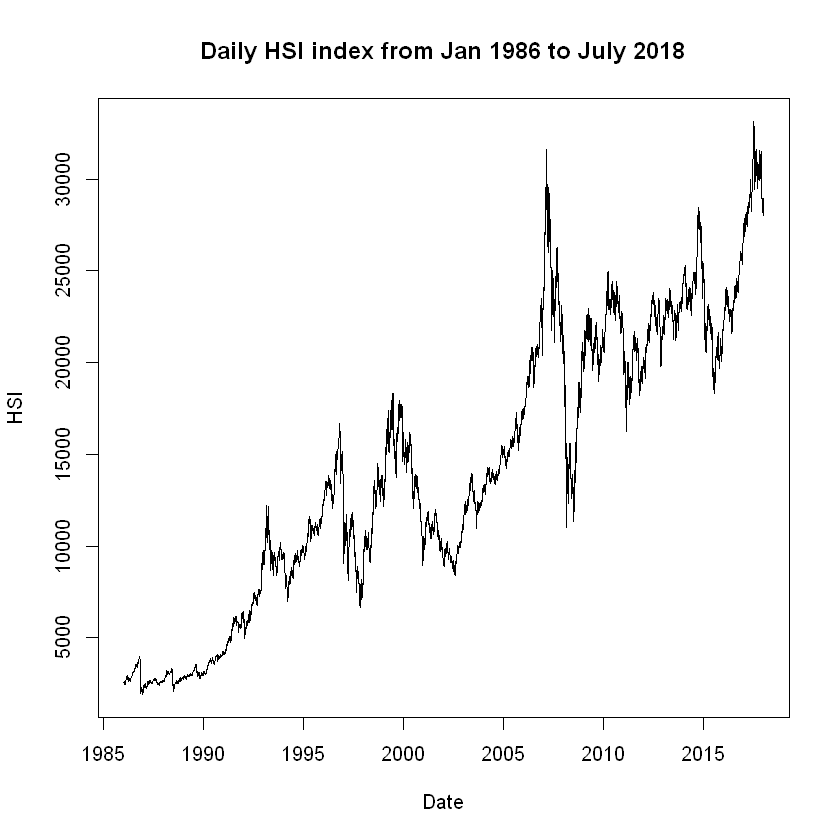

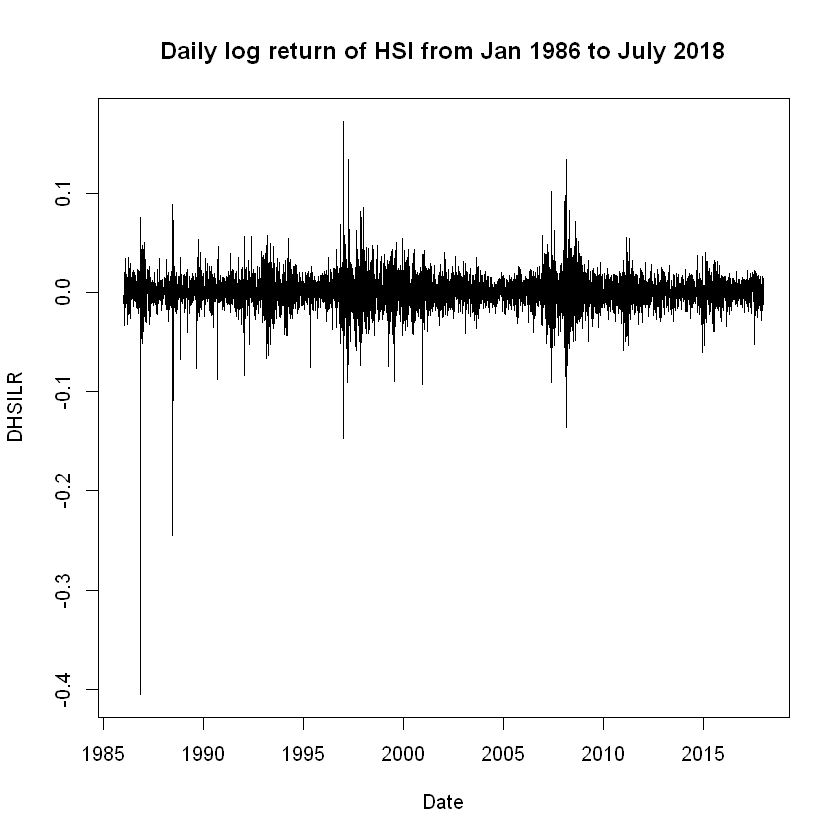

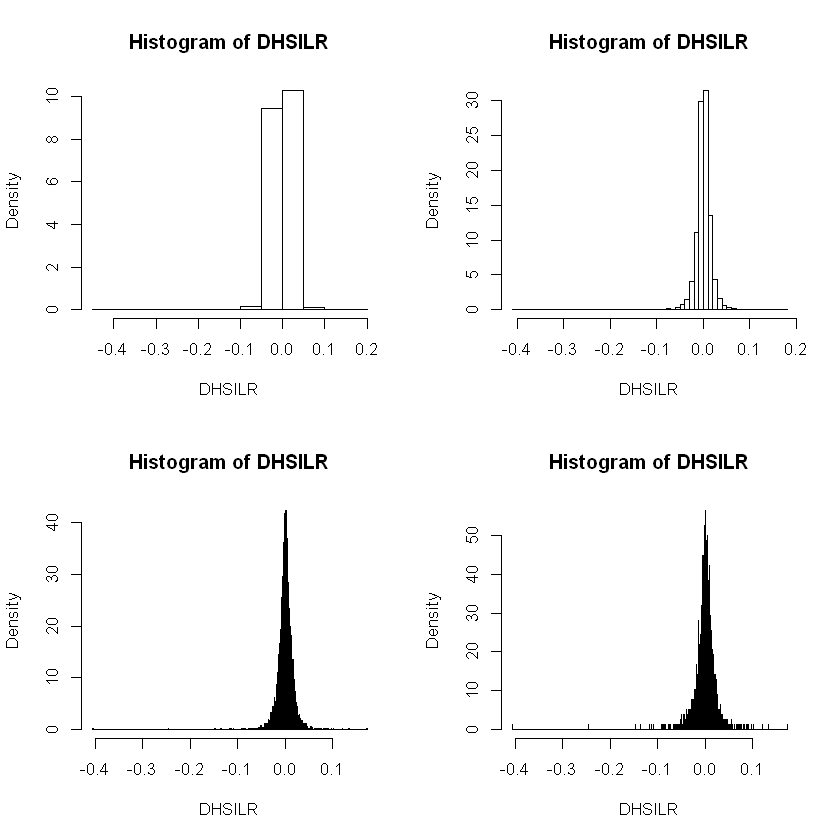

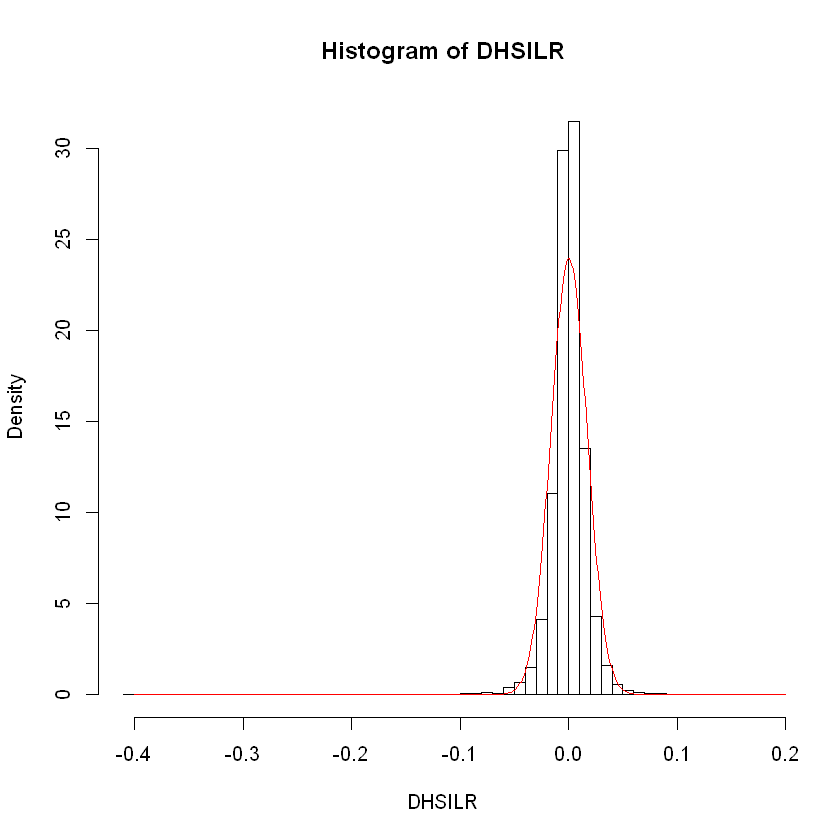

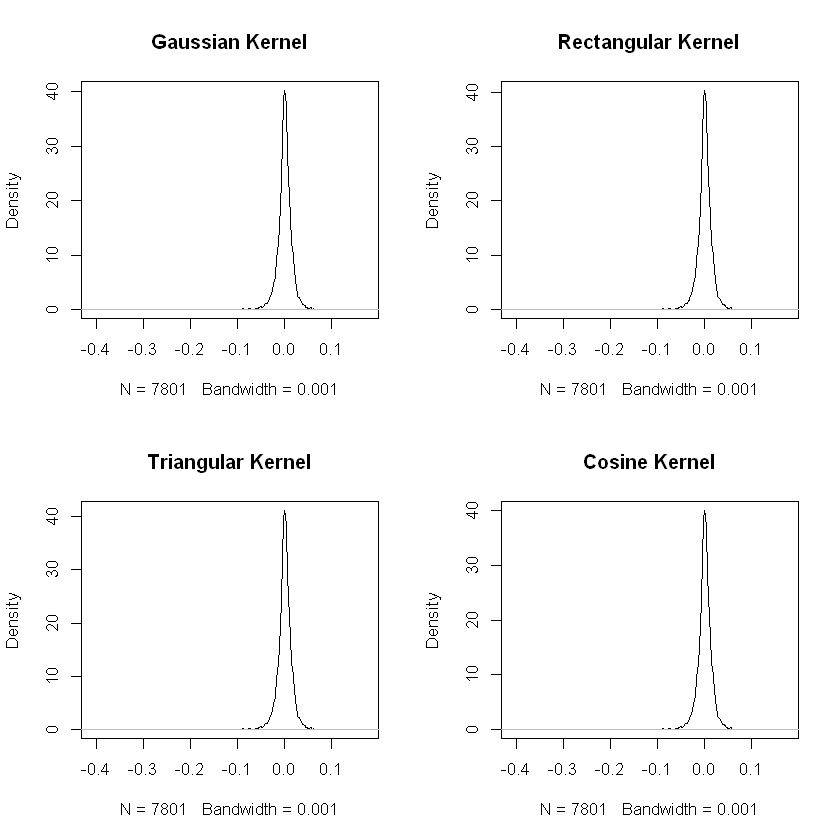

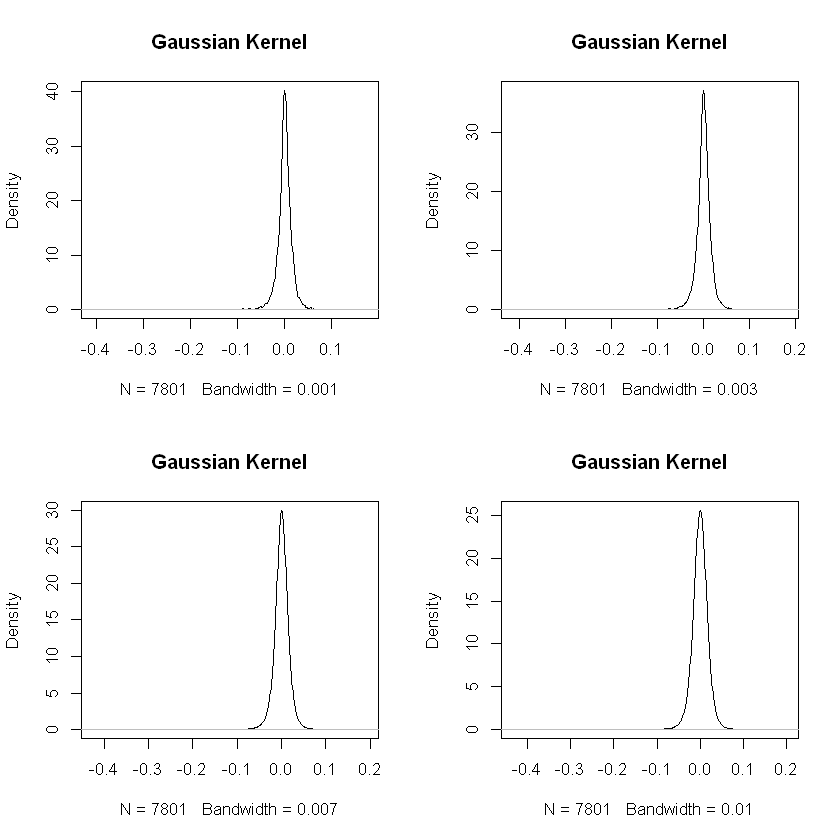

[1] "VaR 0.01, (normal, empirical)"


1% 
0.03842456 0.04384452

[1] "VaR 0.001, (normal, empirical)"


0.1% 
0.05114316 0.09135368

[1] "ES 0.01, (ES_emp, ES_normal)"


[1] 0.07066488 0.04398227

[1] "ES 0.001, (ES_emp, ES_normal)"


[1] 0.1710659 0.0555784

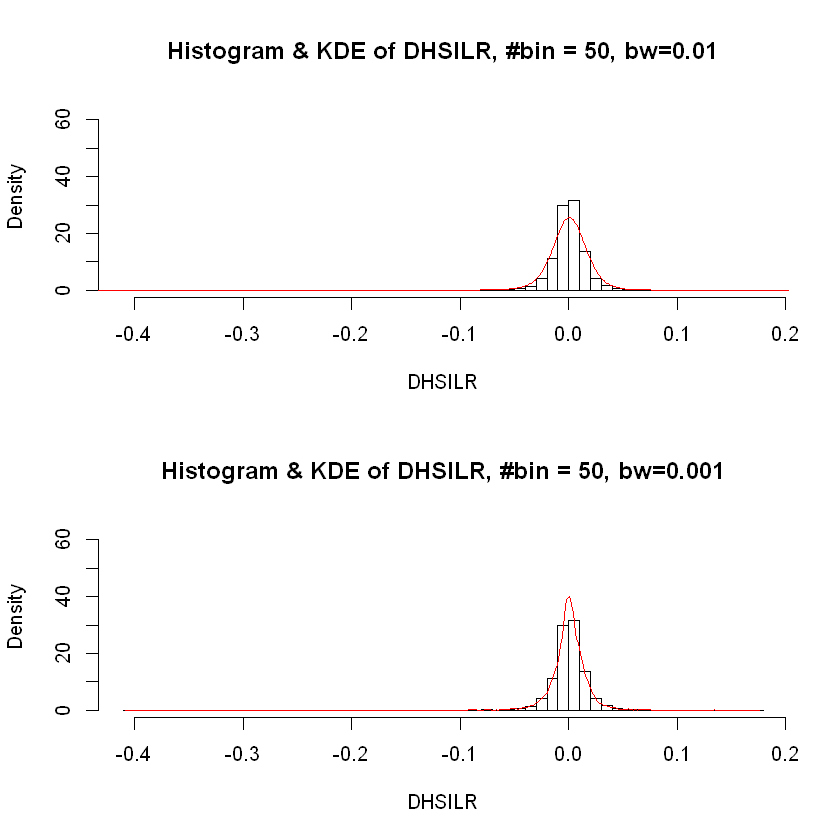

In [4]:
# 1.
DHSI <- read.table("DHSI.csv",header = T, sep=",")
HSI<-rev(DHSI$Close)
DHSILR <- diff(log(HSI))

DHSI_time<- seq(from=1986,to=2018,length.out=length(HSI)) 

plot(DHSI_time,HSI,type="l",xlab="Date",main="Daily HSI index from Jan 1986 to July 2018")

plot(DHSI_time[2:length(DHSI_time)], DHSILR,type="l",xlab="Date",main="Daily log return of HSI from Jan 1986 to July 2018")

# 2.
par(mfrow=c(2,2))  
hist(DHSILR, breaks = 20, freq = F)
hist(DHSILR, breaks = 50, freq = F)
hist(DHSILR, breaks = 500, freq = F)
hist(DHSILR, breaks = 5000, freq = F)

# 3.
par(mfrow=c(1,1))  
hist(DHSILR, breaks = 50, freq = F)
mu_DHSILR <- mean(DHSILR)
sd_DHSILR <- sd(DHSILR)
x<-seq(-0.4,0.2,by=0.001)
y<-dnorm(x,mean=mu_DHSILR,sd = sd_DHSILR)
points(x,y,type="l",col="red")

# 4. 
par(mfrow=c(2,2))  
bw <- 0.001
KD <- density(DHSILR, kernel = "gaussian", bw = bw) 
plot(KD ,main="Gaussian Kernel")
KD <- density(DHSILR, kernel = "rectangular", bw = bw) 
plot(KD ,main="Rectangular Kernel")
KD <- density(DHSILR, kernel = "triangular", bw = bw) 
plot(KD ,main="Triangular Kernel")
KD <- density(DHSILR, kernel = "cosine", bw = bw) 
plot(KD ,main="Cosine Kernel")


# 5. 
par(mfrow=c(2,2))  
bw <- 0.001
KD <- density(DHSILR, kernel = "gaussian", bw = bw) 
plot(KD ,main="Gaussian Kernel")
bw <- 0.003
KD <- density(DHSILR, kernel = "gaussian", bw = bw) 
plot(KD ,main="Gaussian Kernel")
bw <- 0.007
KD <- density(DHSILR, kernel = "gaussian", bw = bw) 
plot(KD ,main="Gaussian Kernel")
bw <- 0.01
KD <- density(DHSILR, kernel = "gaussian", bw = bw) 
plot(KD ,main="Gaussian Kernel")

par(mfrow=c(2,1))
hist(DHSILR,breaks=50,  freq = F,main="Histogram & KDE of DHSILR, #bin = 50, bw=0.01",ylim=c(0,65))   
KD4 <- density(DHSILR, kernel = "gaussian", bw = .01) 
points(KD4,type="l",col="red")

KD9 <- density(DHSILR, kernel = "gaussian", bw = .001) 
hist(DHSILR,breaks=50,  freq = F,main="Histogram & KDE of DHSILR, #bin = 50, bw=0.001",ylim=c(0,65))   
points(KD9,type="l",col="red")

# 6.
q <- 0.01
mu_DHSILR <- mean(DHSILR)
sd_DHSILR <- sd(DHSILR)

VaR_normal <-  -qnorm(q,mu_DHSILR, sd_DHSILR)
VaR_emp <- -quantile(DHSILR,q)

print("VaR 0.01, (normal, empirical)")
# 0.03842456
# 0.04384452 
c (VaR_normal, VaR_emp)


q <- 0.001
mu_DHSILR <- mean(DHSILR)
sd_DHSILR <- sd(DHSILR)

VaR_normal <-  -qnorm(q,mu_DHSILR, sd_DHSILR)
VaR_emp <- -quantile(DHSILR,q)

# 0.05114316
# 0.09135368
print("VaR 0.001, (normal, empirical)")
c (VaR_normal, VaR_emp)


# 7.
q<-0.01

VaR_normal <- - qnorm(q,mu_DHSILR, sd_DHSILR)
VaR_emp <- - quantile(DHSILR,q)
ES_emp <- mean(- DHSILR[- DHSILR > VaR_emp])

N<-1000000
X<-rnorm(N,mu_DHSILR,sd_DHSILR)
ES_normal <- mean(- X[- X > VaR_normal])

print("ES 0.01, (ES_emp, ES_normal)")
c(ES_emp, ES_normal)




q<-0.001

VaR_normal <- - qnorm(q,mu_DHSILR, sd_DHSILR)
VaR_emp <- - quantile(DHSILR,q)
ES_emp <- mean(- DHSILR[- DHSILR > VaR_emp])

N<-1000000
X<-rnorm(N,mu_DHSILR,sd_DHSILR)
ES_normal <- mean(- X[- X > VaR_normal])
print("ES 0.001, (ES_emp, ES_normal)")
c(ES_emp, ES_normal)
